In [1]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from pickle import load
from keras.applications.vgg16 import VGG16
from keras.models import Model,load_model
from keras.preprocessing.sequence import pad_sequences
import os
os.chdir('/home/aninda/Desktop/testProject/captionGenerator/')

/home/aninda/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def pred_description(model,tokenizer,photo,mx_len=34,):
    in_text='startseq'
    print(type(tokenizer))
    for i in range(mx_len):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=mx_len)
        pred = model.predict([photo,sequence], verbose=0)
        pred=np.argmax(pred)
        pred_word=index_word[pred]
        in_text+=' '+pred_word
        if pred_word=='endseq' or pred_word is None:
            break
    in_text=' '.join(in_text.split()[1:-1])
    return in_text

In [3]:
def extract_features(filename):
    model = VGG16()
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    image = load_img(filename, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)

    return model.predict(image, verbose=0)

In [4]:
model=load_model('model/model-ep005-loss3.266-val_loss3.817.h5')
tokenizer=load(open('tokenizer.pkl','rb'))
index_word=load(open('index_word.pkl','rb'))

<class 'keras.preprocessing.text.Tokenizer'>
two person stand on beach


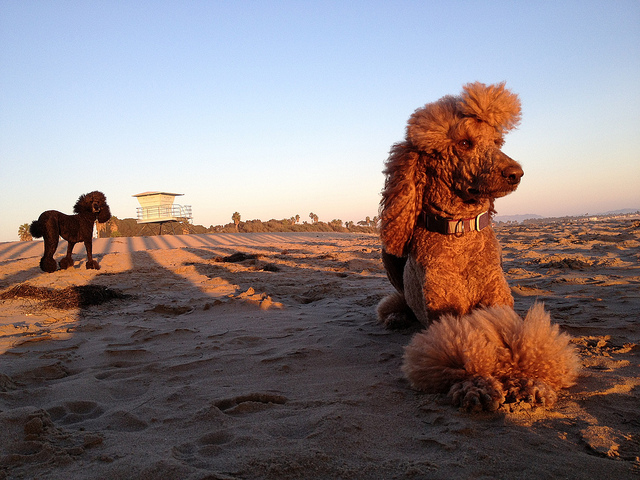

In [5]:
photo = extract_features('example/example1.jpg')
caption=pred_description(model, tokenizer, photo)
im_file=Image.open('example/example1.jpg')
print(caption)
im_file

<class 'keras.preprocessing.text.Tokenizer'>
two young player play soccer game


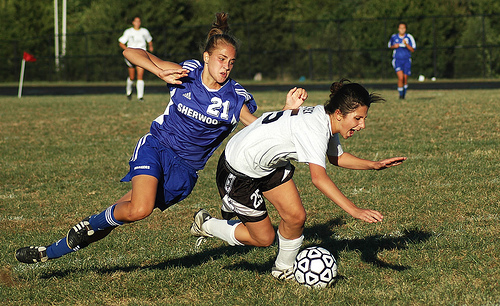

In [7]:
photo = extract_features('example/example2.jpg')
caption=pred_description(model, tokenizer, photo)
im_file=Image.open('example/example2.jpg')
print(caption)
im_file

<class 'keras.preprocessing.text.Tokenizer'>
dog run on beach


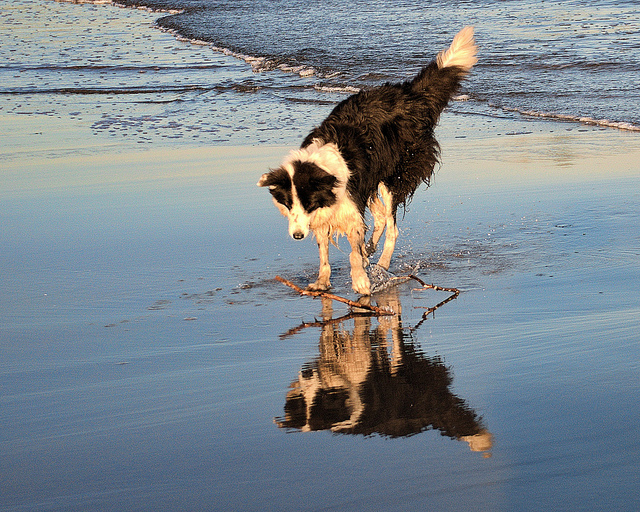

In [8]:
photo = extract_features('example/example3.jpg')
caption=pred_description(model, tokenizer, photo)
im_file=Image.open('example/example3.jpg')
print(caption)
im_file

<class 'keras.preprocessing.text.Tokenizer'>
young girl in blue hair be in the water


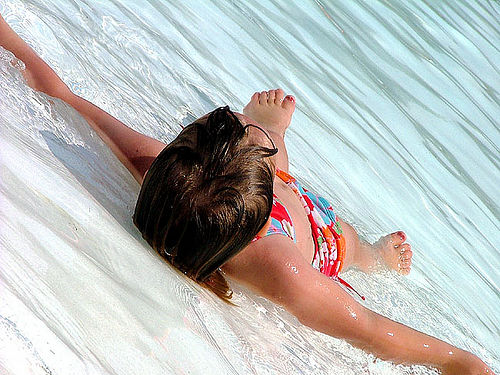

In [5]:
photo = extract_features('example/example4.jpg')
caption=pred_description(model, tokenizer, photo)
im_file=Image.open('example/example4.jpg')
print(caption)
im_file